Epoch 1/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2515 - acc: 0.9276
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1108 - acc: 0.9673
Epoch 3/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0771 - acc: 0.9768
Epoch 4/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0581 - acc: 0.9817
Epoch 5/5
10000/10000 [==============================] - 1s 62us/sample - loss: 0.0849 - acc: 0.9726
Test accuracy: 0.9726
[6.0146326e-06 1.0332215e-04 9.9988484e-01 5.1157317e-06 3.9043740e-16
 2.8614139e-07 2.8728843e-07 1.3435914e-12 2.1203269e-07 2.9881239e-15]
Predicted label: 7
True label: 7


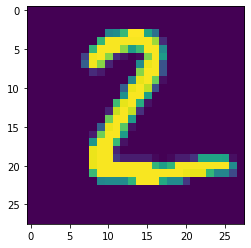

In [3]:
import tensorflow as tf  # Import TensorFlow library for deep learning
from tensorflow.keras.datasets import mnist  # Import MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Load training and test data
x_train, x_test = x_train / 255, x_test / 255  # Normalize pixel values to be between 0 and 1

import matplotlib.pyplot as plt  # Import Matplotlib for plotting
plt.imshow(x_train[0])  # Display the first training image

from tensorflow import keras  # Import Keras API for building neural networks
from tensorflow.keras import layers  # Import Keras layers for building the model

# Define the neural network architecture
model = keras.Sequential([ 
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image into a 1D array
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit) and softmax activation
])

# Compile the model with optimizer, loss function, and evaluation metrics
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model for 5 epochs using the training data
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)  # Print the accuracy on the test dataset

# Make predictions on the test data
predictions = model.predict(x_test)  
print(predictions[1])  # Print the predictions for the second test image
plt.imshow(x_test[1])  # Display the second test image

# Predict the label of the first test image and compare with the true label
predicted_label = model.predict(x_test[0].reshape(1, 28, 28))  # Reshape the first image and predict its label
print(f"Predicted label: {predicted_label.argmax()}")  # Print the predicted label (index of highest probability)
print(f"True label: {y_test[0]}")  # Print the true label of the first image
